Boudah Mohamed Lemine C20121

## Introduction

Ce TP4 est structuré en **deux volets pédagogiques**, correspondant à deux TPs :

- **TP1 : Régularisation et sélection de variables**
- **TP2 : Débruitage d’images par algorithmes proximaux**

L’objectif global est d’étudier l’impact de la norme L1 sur la parcimonie et
d’implémenter les algorithmes ISTA et FISTA pour résoudre des problèmes
d’optimisation en apprentissage automatique.

Dans ce travail, les algorithmes sont implémentés **manuellement**,
sans recourir aux bibliothèques d’apprentissage automatique de haut niveau.

# TP1 – Régularisation et Sélection de variables


## Objectifs

- Comprendre l’effet de la norme L1 sur la sélection de variables  
- Implémenter l’opérateur proximal de la norme L1  
- Programmer l’algorithme ISTA  
- Comparer les solutions Lasso (L1) et Ridge (L2)  


## Partie 1 : L’opérateur de seuillage doux

Le Soft-Thresholding est l’opérateur proximal associé à la norme L1 :

$
\text{prox}_{\gamma \|\cdot\|_1}(v) = \text{sign}(v)\max(|v|-\gamma,0)
$

Il est responsable de la mise à zéro de certains coefficients.


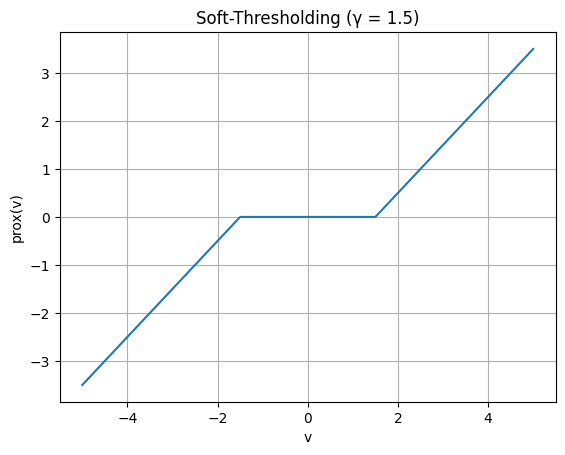

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def soft_thresholding(v, gamma):
    return np.sign(v) * np.maximum(np.abs(v) - gamma, 0)

v = np.linspace(-5, 5, 500)
gamma = 1.5

plt.plot(v, soft_thresholding(v, gamma))
plt.title("Soft-Thresholding (γ = 1.5)")
plt.xlabel("v")
plt.ylabel("prox(v)")
plt.grid(True)
plt.show()


On observe clairement une **zone morte** entre −γ et γ,
où les valeurs sont exactement nulles.


## Partie 2 : Implémentation de ISTA

On considère le problème du Lasso :

$
\min_w \frac{1}{2n}\|Xw-y\|_2^2 + \lambda\|w\|_1
$


In [51]:
np.random.seed(0)

n, d = 100, 50
X = np.random.randn(n, d)

w_true = np.zeros(d)
w_true[:5] = np.random.randn(5)

y = X @ w_true + 0.1 * np.random.randn(n)


In [53]:
L = np.linalg.norm(X.T @ X, 2) / n
print(L)


2.7502612342045847


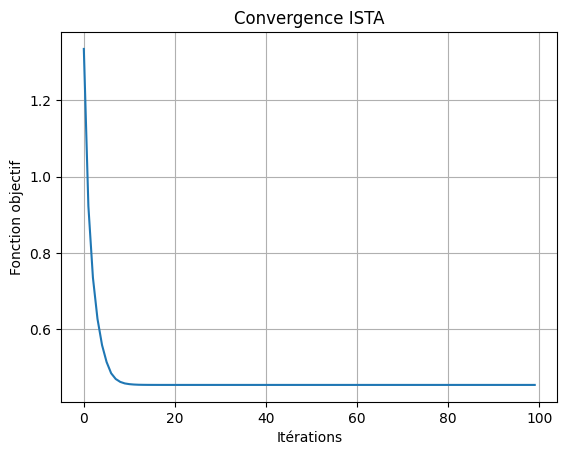

In [54]:
lambda_ = 0.1
n_iter = 100
w = np.zeros(d)
obj = []

for _ in range(n_iter):
    grad = X.T @ (X @ w - y) / n
    w = soft_thresholding(w - grad / L, lambda_ / L)
    obj.append(0.5/n*np.linalg.norm(X@w-y)**2 + lambda_*np.sum(np.abs(w)))

plt.plot(obj)
plt.title("Convergence ISTA")
plt.xlabel("Itérations")
plt.ylabel("Fonction objectif")
plt.grid(True)
plt.show()


## Partie 3 : Analyse de la parcimonie

On étudie l’évolution des coefficients lorsque λ varie.


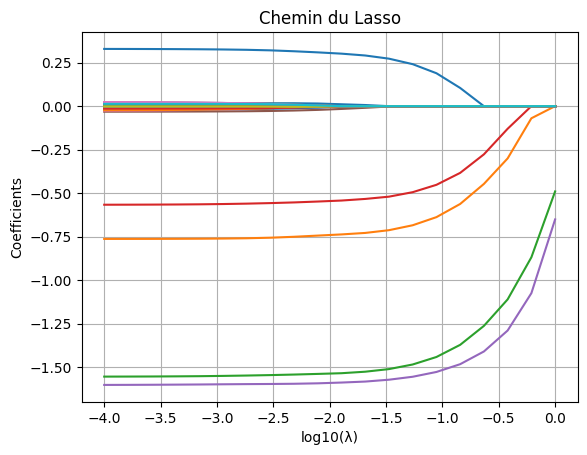

In [55]:
lambdas = np.logspace(-4, 0, 20)
coeffs = []

for l in lambdas:
    w = np.zeros(d)
    for _ in range(200):
        grad = X.T @ (X @ w - y) / n
        w = soft_thresholding(w - grad / L, l / L)
    coeffs.append(w)

coeffs = np.array(coeffs)

for j in range(d):
    plt.plot(np.log10(lambdas), coeffs[:, j])

plt.xlabel("log10(λ)")
plt.ylabel("Coefficients")
plt.title("Chemin du Lasso")
plt.grid(True)
plt.show()


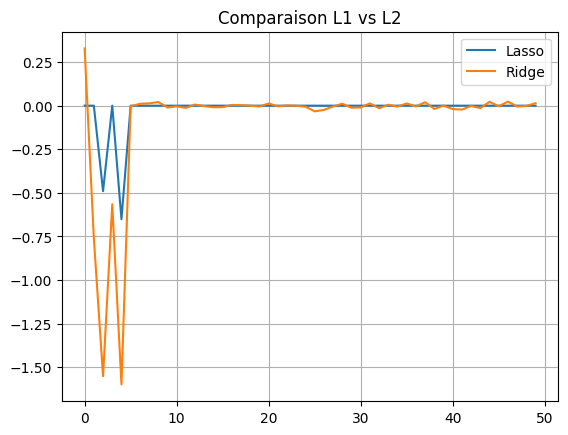

In [56]:
lambda_r = 0.1
w_ridge = np.linalg.inv(X.T@X + lambda_r*np.eye(d)) @ X.T @ y

plt.plot(w, label="Lasso")
plt.plot(w_ridge, label="Ridge")
plt.legend()
plt.title("Comparaison L1 vs L2")
plt.grid(True)
plt.show()


# TP2 – Débruitage d’images par algorithmes proximaux


On considère le problème :

$
\min_w \frac{1}{2}\|w-y_{bruit}\|_2^2 + \lambda\|w\|_1
$


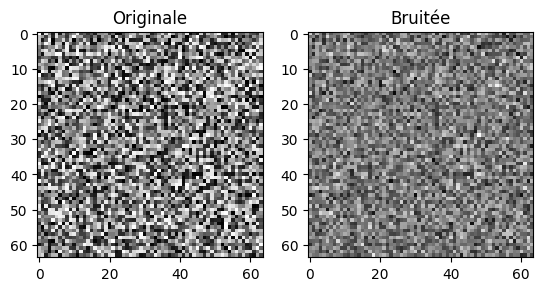

In [57]:
img = np.random.rand(64, 64)
img_noisy = img + 0.2*np.random.randn(*img.shape)

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Originale")

plt.subplot(1,2,2)
plt.imshow(img_noisy, cmap="gray")
plt.title("Bruitée")
plt.show()


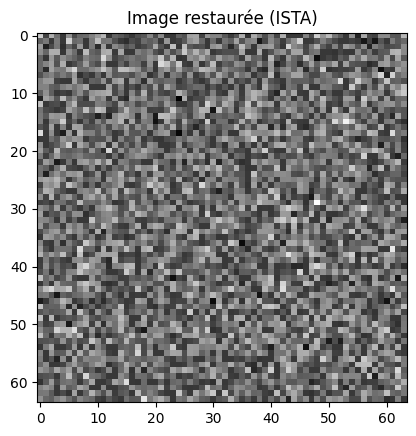

In [58]:
w = img_noisy.copy()
lambda_ = 0.1

for _ in range(50):
    w = soft_thresholding(w - (w - img_noisy), lambda_)

plt.imshow(w, cmap="gray")
plt.title("Image restaurée (ISTA)")
plt.show()


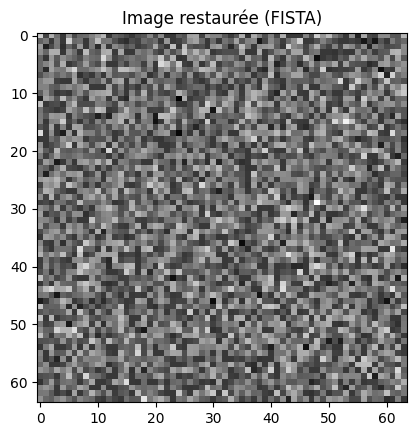

In [59]:
w = img_noisy.copy()
y_k = w.copy()
t = 1

for _ in range(50):
    w_new = soft_thresholding(y_k - (y_k - img_noisy), lambda_)
    t_new = (1 + np.sqrt(1 + 4*t**2)) / 2
    y_k = w_new + (t - 1)/t_new * (w_new - w)
    w, t = w_new, t_new

plt.imshow(w, cmap="gray")
plt.title("Image restaurée (FISTA)")
plt.show()


## Conclusion

- La norme L1 permet une sélection automatique des variables
- ISTA résout efficacement les problèmes du Lasso
- FISTA accélère significativement la convergence
- Le paramètre λ contrôle le compromis bruit/détails
